In [1]:
import seaborn as sns

titanic = sns.load_dataset("titanic")

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 수치형 데이터 시각화

## histplot

<AxesSubplot: xlabel='age', ylabel='Count'>

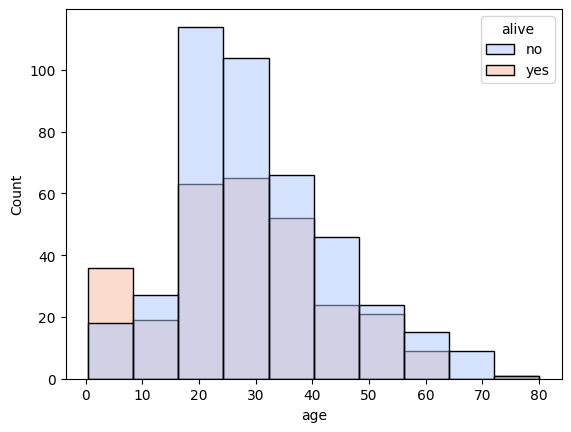

In [5]:
sns.histplot(data=titanic, x="age", bins=10, hue="alive", palette="coolwarm")

<AxesSubplot: xlabel='age', ylabel='Count'>

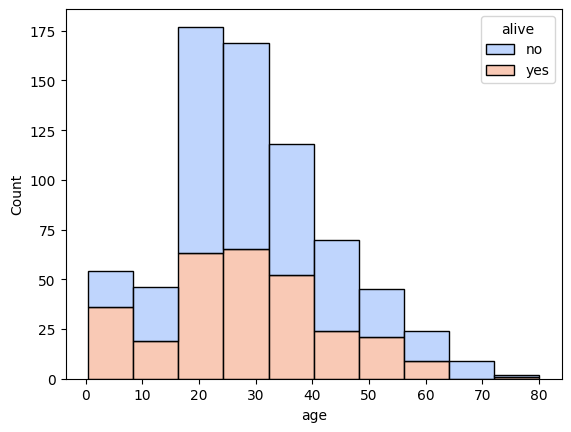

In [7]:
# 포개지 않고 누적해 표현하려면
sns.histplot(
    data=titanic, x="age", bins=10, hue="alive", palette="coolwarm", multiple="stack"
)

## kdeplot

<AxesSubplot: xlabel='age', ylabel='Density'>

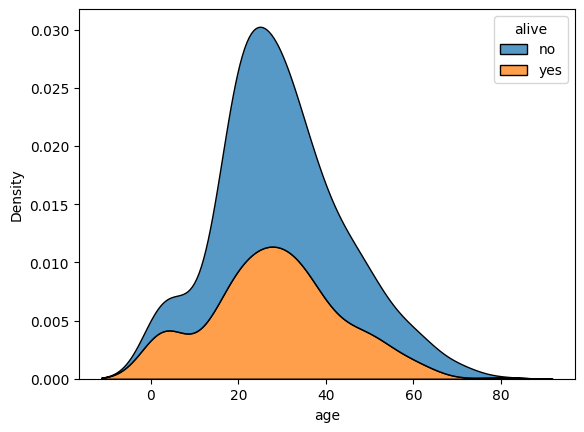

In [8]:
sns.kdeplot(data=titanic, x="age", hue="alive", multiple="stack")

## displot

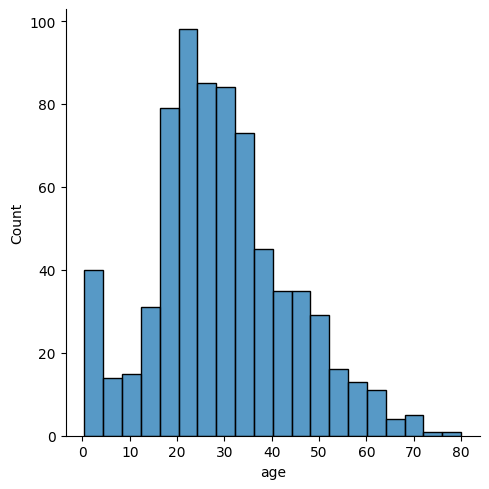

In [9]:
sns.displot(data=titanic, x="age")

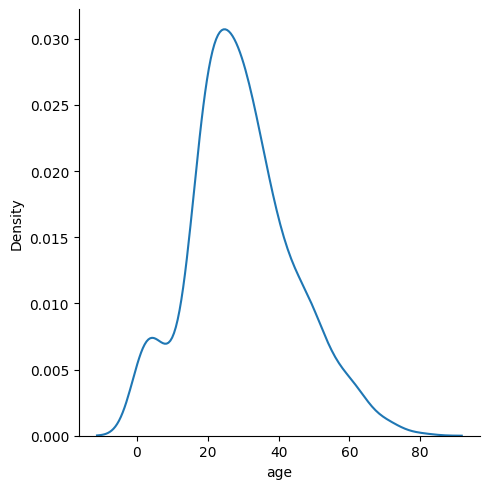

In [10]:
# 커널밀도추정함수
sns.displot(data=titanic, x="age", kind="kde")

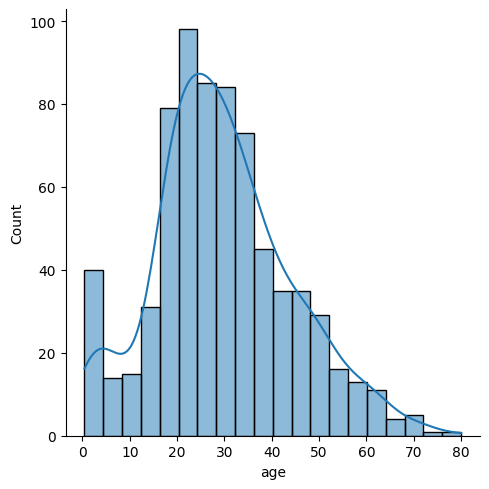

In [13]:
# 커널밀도추정함수 + 히스토그램
sns.displot(data=titanic, x="age", kde=True)

## rugplot

<AxesSubplot: xlabel='age', ylabel='Density'>

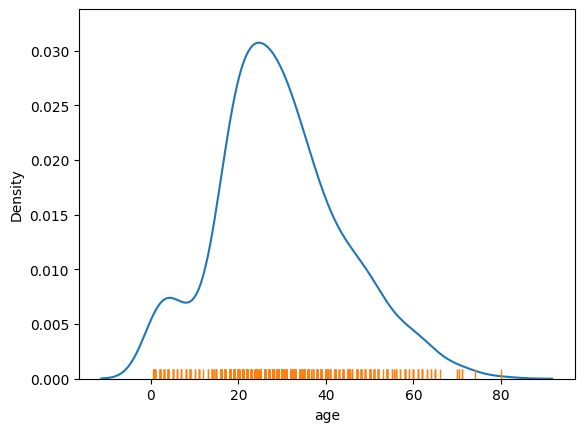

In [ ]:
sns.kdeplot(data=titanic, x="age")
sns.rugplot(data=titanic, x="age")

# 범주형 데이터 시각화

## barplot

- 원본 데이터 평균이 아니라 샘플링한 데이터 평균을 구해줌
- 범주형 데이터별 수치형 데이터의 평균을 구해주기 때문에 feature를 두 개 받음

<AxesSubplot: xlabel='class', ylabel='fare'>

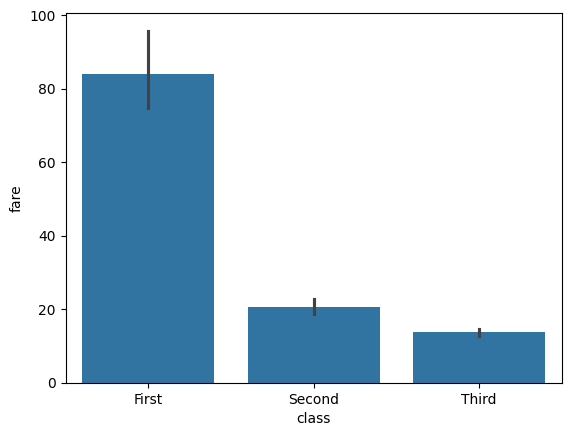

In [16]:
sns.barplot(x="class", y="fare", data=titanic)

- 막대 상단의 검은색 세로줄이 오차 막대(신뢰 구간)
- 등급이 높을수록 평균 운임이 비싸고 신뢰구간이 넓어짐

## pointplot

<AxesSubplot: xlabel='class', ylabel='fare'>

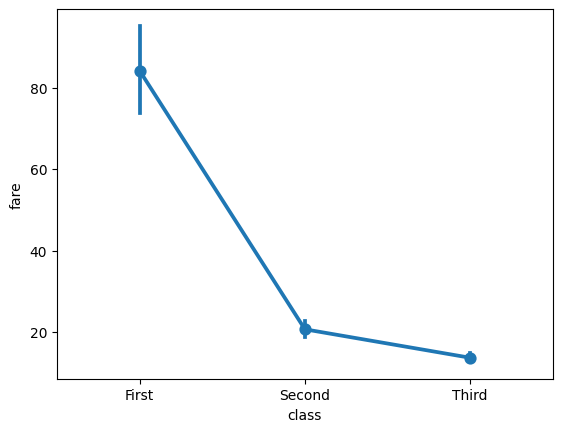

In [17]:
sns.pointplot(x="class", y="fare", data=titanic)

- 한 화면에 여러 그래프를 그릴 떄 유용함

## boxplot

<AxesSubplot: xlabel='class', ylabel='age'>

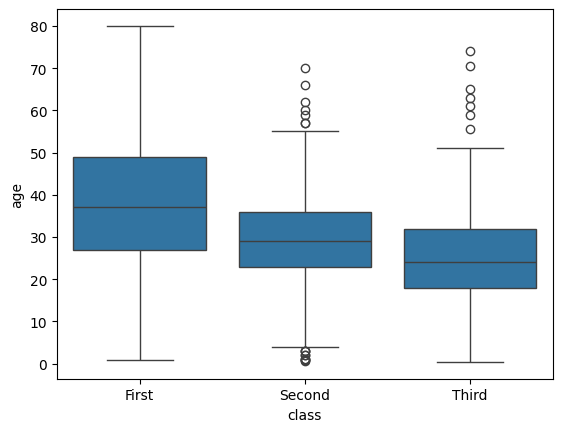

In [18]:
sns.boxplot(x="class", y="age", data=titanic)

## violinplot

<AxesSubplot: xlabel='class', ylabel='age'>

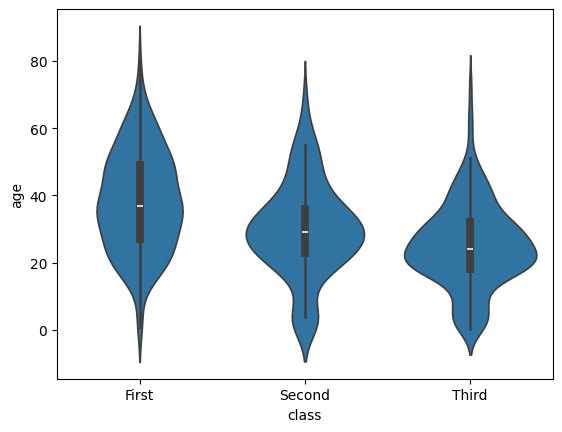

In [19]:
sns.violinplot(x="class", y="age", data=titanic)

<AxesSubplot: xlabel='class', ylabel='age'>

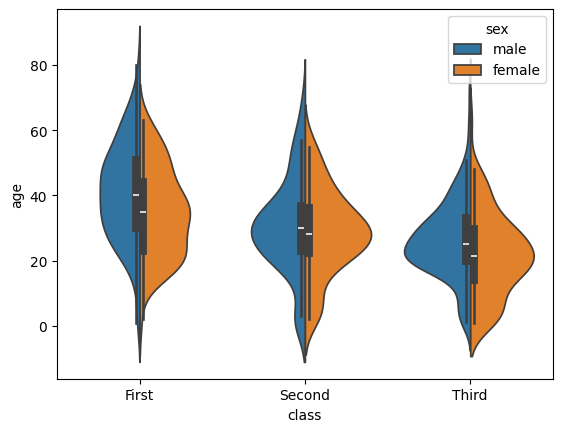

In [20]:
sns.violinplot(x="class", y="age", hue="sex", data=titanic, split=True)

## countplot

<AxesSubplot: xlabel='class', ylabel='count'>

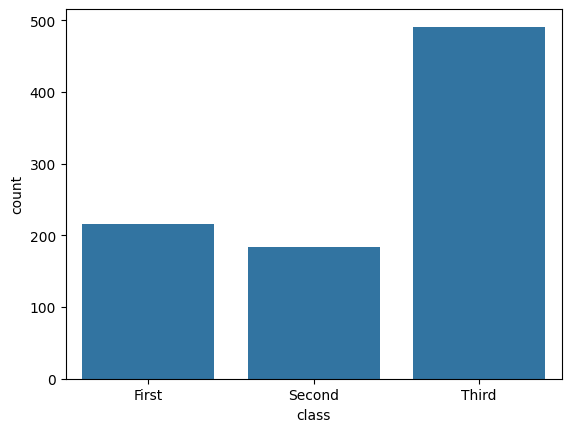

In [21]:
sns.countplot(x="class", data=titanic)

<AxesSubplot: xlabel='count', ylabel='class'>

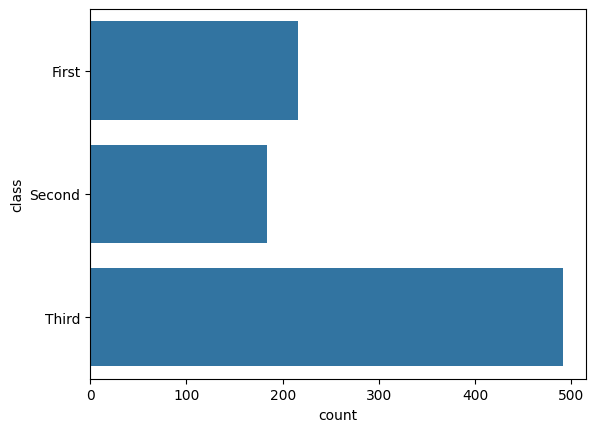

In [22]:
# 범주형 데이터의 개수가 너무 많아 그래프가 옆으로 넓어져 보기 불편할 때 유용
sns.countplot(y="class", data=titanic)

## pie graph

In [23]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x19d9a59d0>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

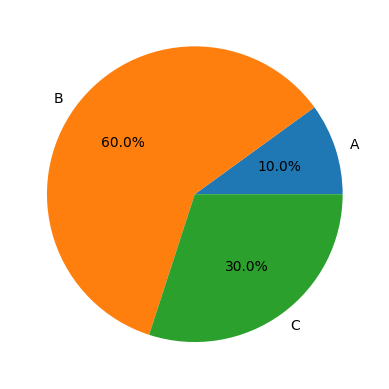

In [24]:
x = [10, 60, 30]
labels = ["A", "B", "C"]

plt.pie(x=x, labels=labels, autopct="%.1f%%")

# 데이터 관계 시각화 

## heatmap

In [25]:
flights = sns.load_dataset("flights")

In [26]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [27]:
# 월별 승객수를 알고 싶음
flights_pivot = flights.pivot_table(index="month", columns="year", values="passengers")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot: xlabel='year', ylabel='month'>

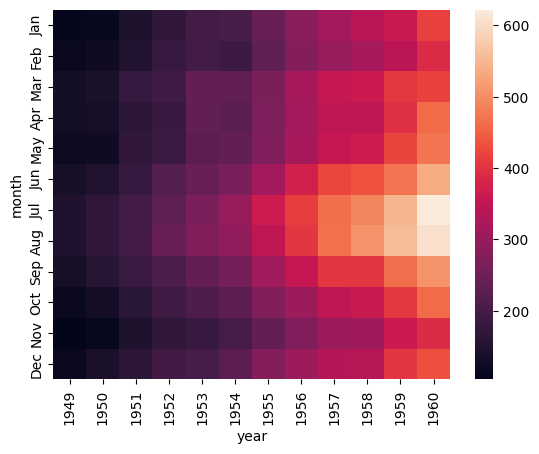

In [28]:
sns.heatmap(data=flights_pivot)

## lineplot

<AxesSubplot: xlabel='year', ylabel='passengers'>

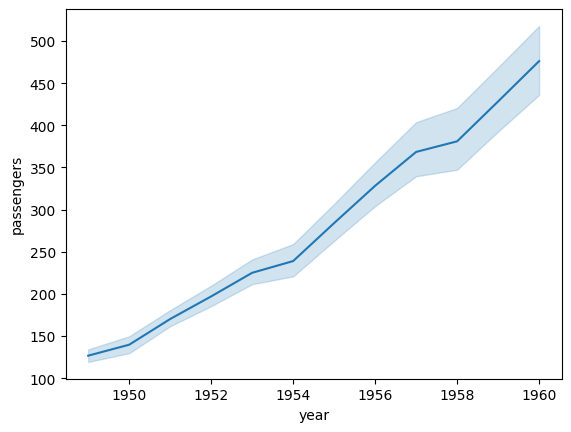

In [29]:
sns.lineplot(x="year", y="passengers", data=flights)

- 해가 갈수록 평균 승객수가 많아짐
- 실선 주변의 음영은 95%의 신뢰구간

## scatterplot

In [30]:
tips = sns.load_dataset("tips")

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='total_bill', ylabel='tip'>

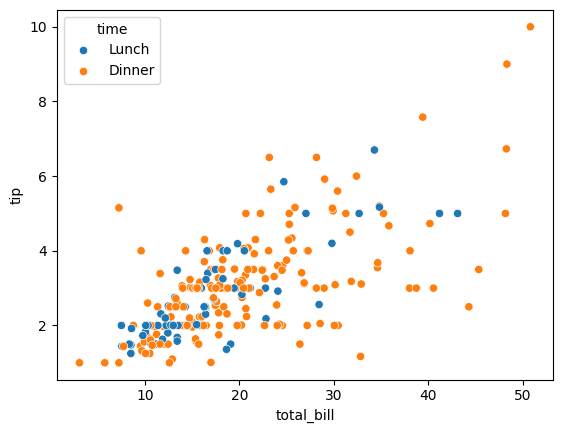

In [ ]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

## regplot

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

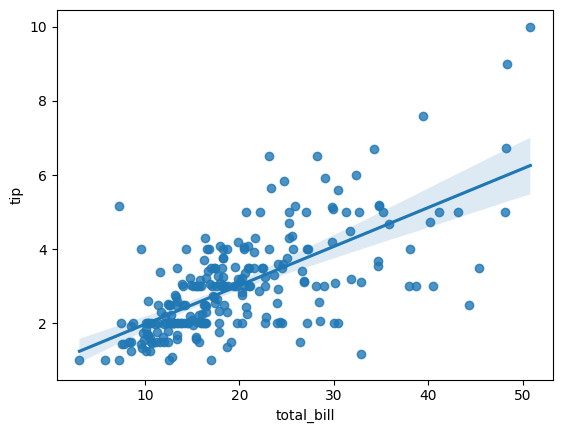

In [34]:
# 95% 신뢰구간
sns.regplot(x="total_bill", y="tip", data=tips)

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

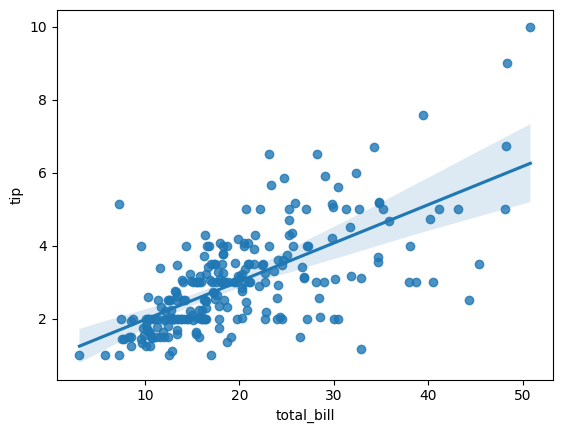

In [35]:
# 99% 신뢰구간으로 설정
sns.regplot(x="total_bill", y="tip", ci=99, data=tips)